#Dan Clayton<br>
#Assignment 3.2--How to increase MLB attendance

In [2]:
#Import some important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
#Import data
df = pd.read_csv('dodgers-2022.csv')

In [29]:
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


In [30]:
#Prep the data for closer analysis

#Convert many of the variables in the dataframe for easier analysis
#wkday_dict = {'Sunday':1, 'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 'Friday':6, 'Saturday':7}
#df = df.replace({"day_of_week": wkday_dict})

#Days of the week are categorical--breaking these out into dummy columns instead
df = pd.get_dummies(df, columns=['day_of_week'])

#Drop day of the month
df.drop('day', axis=1, inplace=True)

#Convert month to dummy variable
df = pd.get_dummies(df, columns=['month'])

#Convert other "Yes No" values to boolean 1, 0
df.replace(('YES', 'NO'), (1, 0), inplace=True)


#Convert day_night to 1 for day, 0 for night
df.replace(('Day', 'Night'), (1, 0), inplace=True)

#Convert skies: clear = 1, cloudy = 0
df.replace(('Clear', 'Cloudy'), (1, 0), inplace=True)

#Create dummy vartiables for opponent column
df = pd.get_dummies(df, columns=['opponent'])


In [31]:
df

,attend,temp,skies,day_night,cap,shirt,fireworks,bobblehead,day_of_week_Friday,day_of_week_Monday,...,opponent_Marlins,opponent_Mets,opponent_Nationals,opponent_Padres,opponent_Phillies,opponent_Pirates,opponent_Reds,opponent_Rockies,opponent_Snakes,opponent_White Sox
0,56000,67,Clear,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,29729,58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,28328,57,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,31601,54,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,46549,57,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,40724,84,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
77,35607,95,Clear,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
78,33624,86,Clear,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79,42473,83,Clear,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


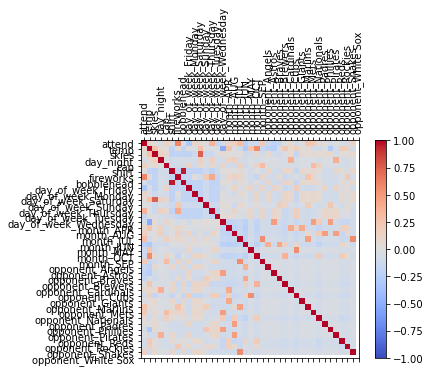

In [32]:
#Create a visual showing the correlation between all features
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [33]:
#Create an ordered list showing the feature correlations with attendance--this is dynomite!
corr_matrix = df.corr()
print(corr_matrix["attend"].sort_values(ascending=False))

attend                   1.000000
bobblehead               0.581895
day_of_week_Tuesday      0.355316
month_JUN                0.295853
opponent_Mets            0.236213
opponent_Angels          0.207796
opponent_Nationals       0.195667
month_JUL                0.143837
shirt                    0.133269
opponent_White Sox       0.127046
day_of_week_Saturday     0.107788
temp                     0.098951
month_AUG                0.098944
opponent_Cubs            0.075310
day_of_week_Sunday       0.065153
opponent_Padres          0.045111
day_night                0.043544
opponent_Phillies        0.020380
fireworks                0.002094
opponent_Cardinals      -0.006967
opponent_Marlins        -0.008912
opponent_Reds           -0.009301
day_of_week_Thursday    -0.019679
day_of_week_Friday      -0.048948
cap                     -0.055002
opponent_Rockies        -0.060404
opponent_Pirates        -0.071849
month_APR               -0.073237
opponent_Snakes         -0.073943
opponent_Giant

Reasoning and conclusion:<br><br>

Maximizing attendance will require making changes in several key areas:<br>
1) Month of play<br>
Attendance is much higher in June, July, and August, with the weakest months being May, September, October, and April, respectively.  

If June, July, and August games are not typically sold out, then marketing dollars would likely be mazimized during these months.  If games in these months are already sold out, then marketing would be better spent trying to grow attendance April, which is the least poorly attended of the remaining months.  <br>

2) Day of the week<br>
Tuesday games drive more spectators to the stadium, with Monday games driving the fewest.  If any Tuesdays don't already have games scheduled, I recommend moving Monday games to those Tuesdays (except where a holiday or other event might supercede the game).  If capacity remains in these days then marketing should be made to increase attendance for Tuesdays, Saturdays, and Sundays, in that order.  Mondays, and Wednesdays should be avoided, as these are the least popular ball game days.

3) Opponents<br>
Certain opponents bring in business.  This could be due to their performance in the current and last couple of seasons (high performing teams draw more spectators), but is more likely due to their respective fan bases being more or less prevalent in the area.  If the games are not typically sold out, then we would be wise to promote games against the Mets, the Angels, and the Nationals.  Ideally, we would put less effort into promoting games with the Braves, Brewers, and Astros.  

If possible, it would be great to schedule more games with the Mets, Angels, and Nationals, and to cancel games with the Braves, Brewers, and Astros--league rules may or may not allow this.<br>

4) Other marketing gimicks<br>
Bobble heads and shirts bring people to the games, while fireworks and ball caps are less effective.  Spending less money on fireworks and ball caps and then redirecting those funds towards more bobbleheads and shirts would improve attendance.  Of course, any changes in swag need to be marketed (no point making the change if nobody knows about it).  <br>

Of all the items listed above the following 3 are the most likely to have the biggest impact:
1) Move Monday games to Tuesdays, where possible<br>
2) Move May games to June, where possible<br>
3) Move the funds for ball cap nights to more bobble head nights<br>